In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

        A      B      C    D
0    98.0   95.0   85.0  1.0
1   100.0   95.0   98.0  1.0
2    90.0   90.0   98.0  1.0
3    95.0   85.0   90.0  1.0
4    90.0   90.0   85.0  2.0
..    ...    ...    ...  ...
95  100.0   95.0   98.0  1.0
96  100.0  100.0   98.0  2.0
97  104.0   95.0   90.0  2.0
98   95.0   95.0  104.0  1.0
99    1.0    1.0    1.0  1.0

[100 rows x 4 columns]
[2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2.
 1. 2. 2. 1. 1. 1.]
0.4666666666666667
|--- feature_1 <= 92.50
|   |--- feature_2 <= 87.50
|   |   |--- class: 1.0
|   |--- feature_2 >  87.50
|   |   |--- class: 1.0
|--- feature_1 >  92.50
|   |--- feature_0 <= 96.50
|   |   |--- class: 1.0
|   |--- feature_0 >  96.50
|   |   |--- class: 2.0



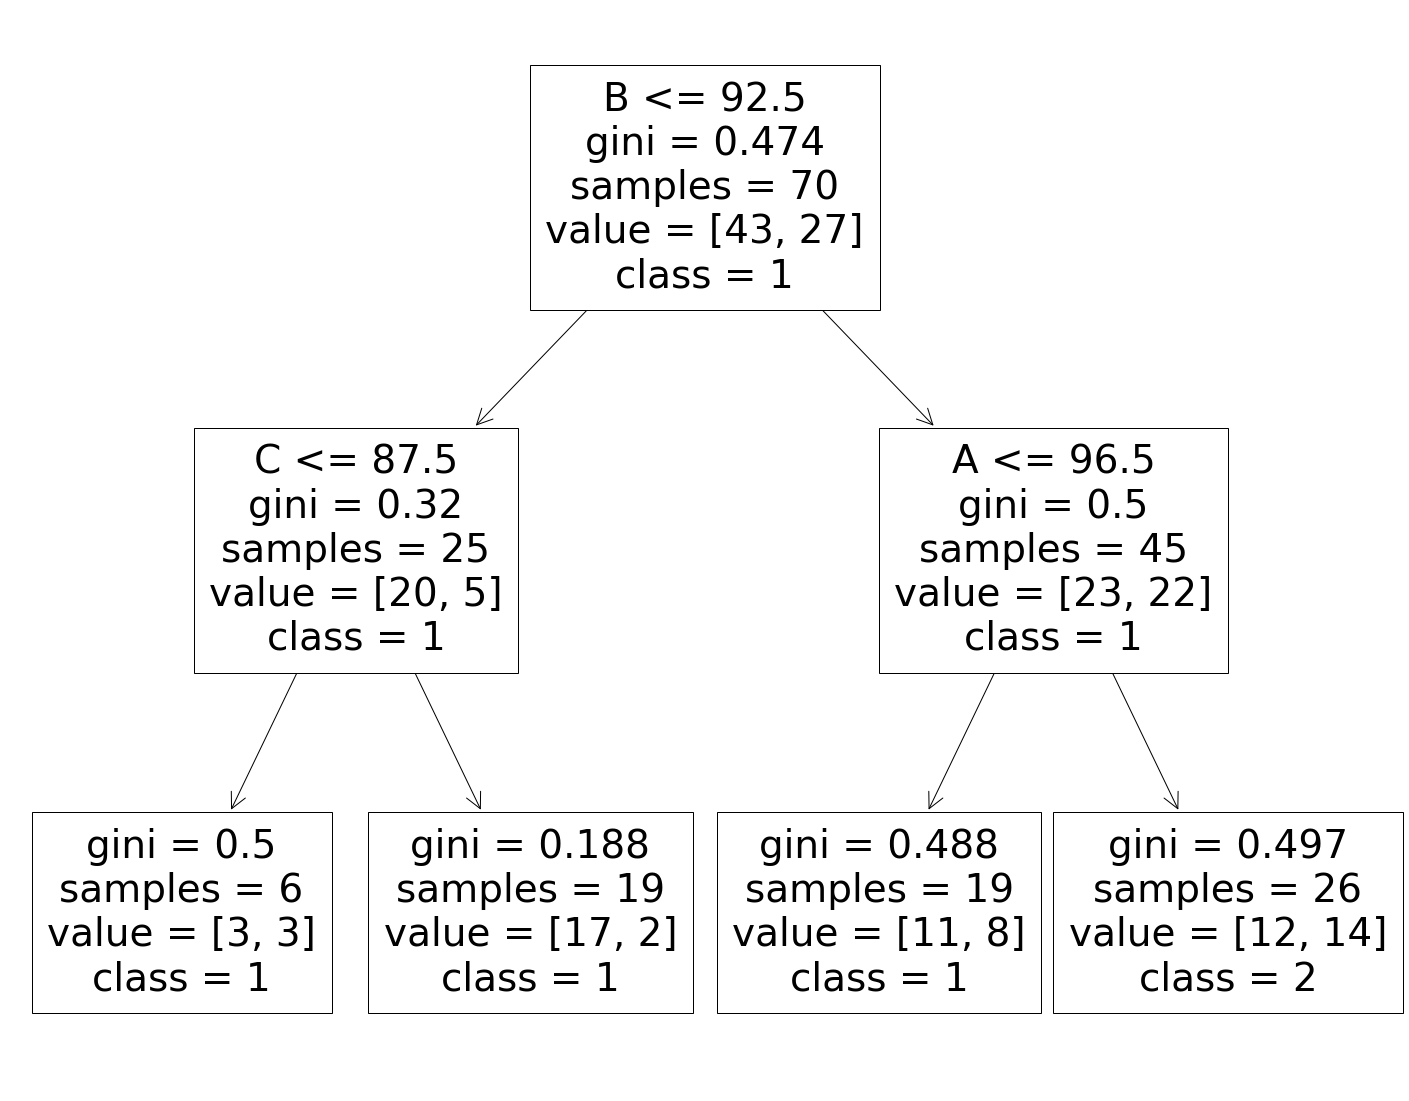

In [5]:
import numpy as np
import pandas as pd
import random
import os

data = pd.read_csv('/content/TheFirstDataCSV.csv')
data.head()

 
DF = pd.DataFrame(columns=['A','B','C', 'D'])

AttrubuteA1 = np.empty(100)
for i in range(0,99):
    AttrubuteA1[i] =  random.choice([100,90, 95, 98, 85, 104])
 
AttrubuteA2 = np.empty(100)
for i in range(0,99):
    AttrubuteA2[i] =  random.choice([100,90, 95, 98, 85, 104])

AttrubuteA3 = np.empty(100)
for i in range(0,99):
    AttrubuteA3[i] =  random.choice([100,90, 95, 98, 85, 104])


 
decisionClass = np.empty(100)
for i in range(0,99):
    decisionClass[i] =  random.choice([1, 2])

DF = DF.assign(A=AttrubuteA1)
DF['A'] = DF['A'].apply(np.ceil)

DF = DF.assign(B=AttrubuteA2)
DF['B'] = DF['B'].apply(np.ceil)


DF = DF.assign(C=AttrubuteA3)
DF['C'] = DF['C'].apply(np.ceil)

DF = DF.assign(D=decisionClass)
DF['D'] = DF['D'].apply(np.ceil)
 
DF.to_csv("TheFinalDataCSV.csv")
 
data = DF
print(data)


data = data.dropna()
X = data[['A', 'B', 'C' ]]
y = data[['D']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

decisionTable = DecisionTreeClassifier(max_depth=2)
decisionTableModel = decisionTable.fit(x_train, y_train)

predictions = decisionTable.predict(x_test)
print(predictions[:50])
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

text_representation = tree.export_text(decisionTable)
print(text_representation)


fig = plt.figure(figsize=(25,20))
class_names = ['1', '2']
_ = tree.plot_tree(decisionTable, feature_names=X.columns,  
                                class_names=class_names )